In [1]:
# first compile the c modules where the model depends on
from  explain_core.ModulesCompiler import compile_modules;
compile_modules()

# import the model engine and the model interface
from explain_core.ModelEngine import ModelEngine
from explain_core.helpers.Interface import Interface

# instantiate a model engine instance with the 'normal_neonate' model definition
model = ModelEngine("normal_neonate.json")

# get a reference to all the submodels
models = model.models

# instantiate an interface object to interact with the model engine instance
neo = Interface(model)

# enable or disable the physiological submodels
neo.ans(True)
neo.breathing(True)
neo.metabolism(True)
neo.mob(True)

# desiable the extra-corporeal models
neo.placenta(False)
neo.ventilator(False)
neo.ecls(False)
neo.artificial_whomb(False)

# BLOOD PRESSURE EFFECTS
models["Ans"].min_baro = 20.0
models["Ans"].set_baro = 57.5
models["Ans"].max_baro = 100.0

# target vector: heart_rate
models["Ans"].heart_rate_ref = 140.0
models["Ans"].g_map_hp = -1.88              
models["Ans"].tc_map_hp = 2.0
# hypotension   = (20 - 57.5)  * -1.88 = 70.5 + heart_rate_ref      (max heart_rate 210.5 bpm)
# hypertension  = (100 - 57.5) * -1.88 = -79.9 + heart_rate_ref     (min heart_rate 60.1 bpm)

# target vector: u_vol -> venous pool
models["Ans"].g_map_ven_pool = 0.0267    
models["Ans"].tc_map_ven_pool = 60.0
# hypotension   = (20 - 57.5)  * 0.0267 = -1.0 - ven_pool_ref       (max decrease of u_vol by factor 2.0)
# hypertension  = (100 - 57.5) * 0.0267 = 1.13 + ven_pool_ref       (max increase of u_vol by factor 2.13)

# target vector: el_max -> contractility
models["Ans"].g_map_cont = -0.013       
models["Ans"].tc_map_cont = 15.0
# hypotension   = (20 - 57.5)  * -0.013 = 0.50 + cont_ref           (max increase of el_max by factor 1.5)
# hypertension  = (100 - 57.5) * -0.013 = -0.56 - conr_ref          (max decrease of el_max by factor 1.56)

# target vector: r_for and r_back -> systemic vascular resistance
models["Ans"].g_map_svr = -0.0267
models["Ans"].tc_map_svr = 30.0
# hypotension   = (20 - 57.5)  * -0.0267 = 1.0 + svr_ref            (max increase of r_ans by factor 2.0)
# hypertension  = (100 - 57.5) * -0.0267 = -1.13 - svr_ref          (max decrease of r_ans by factor 2.13)


#PCO2 EFFECTS
models["Ans"].min_pco2 = 15.0
models["Ans"].set_pco2 = 35
models["Ans"].max_pco2 = 75.0
models["Ans"].minute_volume_ref = 0.66

# target vector : target_minute_volume
models["Ans"].g_pco2_ve = 0.02  
models["Ans"].tc_pco2_ve = 12.0
# hypocapnia    = (15 - 35) * 0.02 = -0.4 + minute_volume_ref   (minimal mv 0.26 l/min)
# hypercapnia   = (75 - 35) * 0.02 = 0.8  + minute_volume_ref   (maximal mv 1.46 l/min)

# target vector: heart_rate
models["Ans"].g_pco2_hp = 0.25  
models["Ans"].tc_pco2_hp = 60.0
# hypocapnia    = (15 - 35) * 0.25 = -5                         (max decrease of heartrate by 5 bpm )
# hypercapnia   = (75 - 35) * 0.25 = 10                         (max increase of heartrate by 10 bpm )

# target vector: el_max -> contractility -> no effect
models["Ans"].g_pco2_cont = -0.01      
models["Ans"].tc_pco2_cont = 10.0

# target vector: u_vol -> venous pool -> no effect
models["Ans"].g_pco2_venpool = 0.0      
models["Ans"].tc_pco2_venpool = 10.0

# target vector: r_for and r_back -> systemic vascular resistance -> no effect
models["Ans"].g_pco2_svr = 0.0       
models["Ans"].tc_pco2_svr = 10.0

# target vector: r_for and r_back -> pulmonary vascular resistance -> no effect
models["Ans"].g_pco2_pvr = 0.0      
models["Ans"].tc_pco2_pvr = 10.0



# PH EFFECTS
models["Ans"].min_ph = 6.9
models["Ans"].set_ph = 7.4
models["Ans"].max_ph = 7.7

# target vector : target_minute_volume
models["Ans"].g_ph_ve = -1.5
models["Ans"].tc_ph_ve = 10.0
# acidosis    = (6.9 - 7.4) * -1.5 = 0.75 + minute_volume_ref   (maximal mv 1.41 l/min)
# alkalosis   = (7.7 - 7.4) * -1.5 = -0.45 + minute_volume_ref  (minimal mv 0.21 l/min)

# target vector: heart_rate -> not modeled
models["Ans"].g_ph_hp = 0
models["Ans"].tc_ph_hp = 10.0

# target vector: el_max -> contractility -> not modeled
models["Ans"].g_ph_cont = 0.4 
models["Ans"].tc_ph_cont = 10.0
# acidosis    = (6.9 - 7.4) * 0.4 = -0.20 - cont_ref            (max decrease of el_max by factor 1.20)
# alkalosis   = (7.7 - 7.4) * 0.4 = -0.12 + cont_ref            (max increase of el_max by factor 1.12)

# target vector: u_vol -> venous pool -> no effect
models["Ans"].g_ph_venpool = 0.0      
models["Ans"].tc_ph_venpool = 10.0

# target vector: r_for and r_back -> systemic vascular resistance -> no effect
models["Ans"].g_ph_svr = 0.0       
models["Ans"].tc_ph_svr = 10.0

# target vector: r_for and r_back -> pulmonary vascular resistance -> no effect
models["Ans"].g_ph_pvr = 0.0      
models["Ans"].tc_ph_pvr = 10.0


#PO2 EFFECTS
models["Ans"].min_po2 = 30.0
models["Ans"].set_po2 = 80.0
models["Ans"].max_po2 = 103.0

models["Ans"].g_po2_ve = -0.0068     
models["Ans"].tc_po2_ve = 10.0
# hypoxia   = (30 - 80) * -0.0068  = 0.34 + minute_volume_ref   (maximal mv 1 l/min)
# hyperoxia = (103 - 80) * -0.0068 = -0.16  + minute_volume_ref (minimal mv 0.5 l/min)

# target vector: heart_rate -> no effect
models["Ans"].g_po2_hp = -0.2     
models["Ans"].tc_po2_hp = 10.0

# target vector: el_max -> contractility -> no effect
models["Ans"].g_po2_cont = 0.0      
models["Ans"].tc_po2_cont = 10.0

# target vector: u_vol -> venous pool -> no effect
models["Ans"].g_po2_venpool = 0.0      
models["Ans"].tc_po2_venpool = 10.0

# target vector: r_for and r_back -> systemic vascular resistance -> no effect
models["Ans"].g_po2_svr = 0.0       
models["Ans"].tc_po2_svr = 10.0

# target vector: r_for and r_back -> pulmonary vascular resistance -> no effect
models["Ans"].g_po2_pvr = 0.0      
models["Ans"].tc_po2_pvr = 10.0

# stabilize by calculating 60 seconds with fixed resp_rate of 40/min, tidal volume of 16 ml and fixed heart rate of 140 / min
neo.calculate(60)
# 51/34 1600e

 Model 'normal neonate' loaded and initialized correctly.
 Ready in 3.9 sec. Average model step in 0.0323 ms.


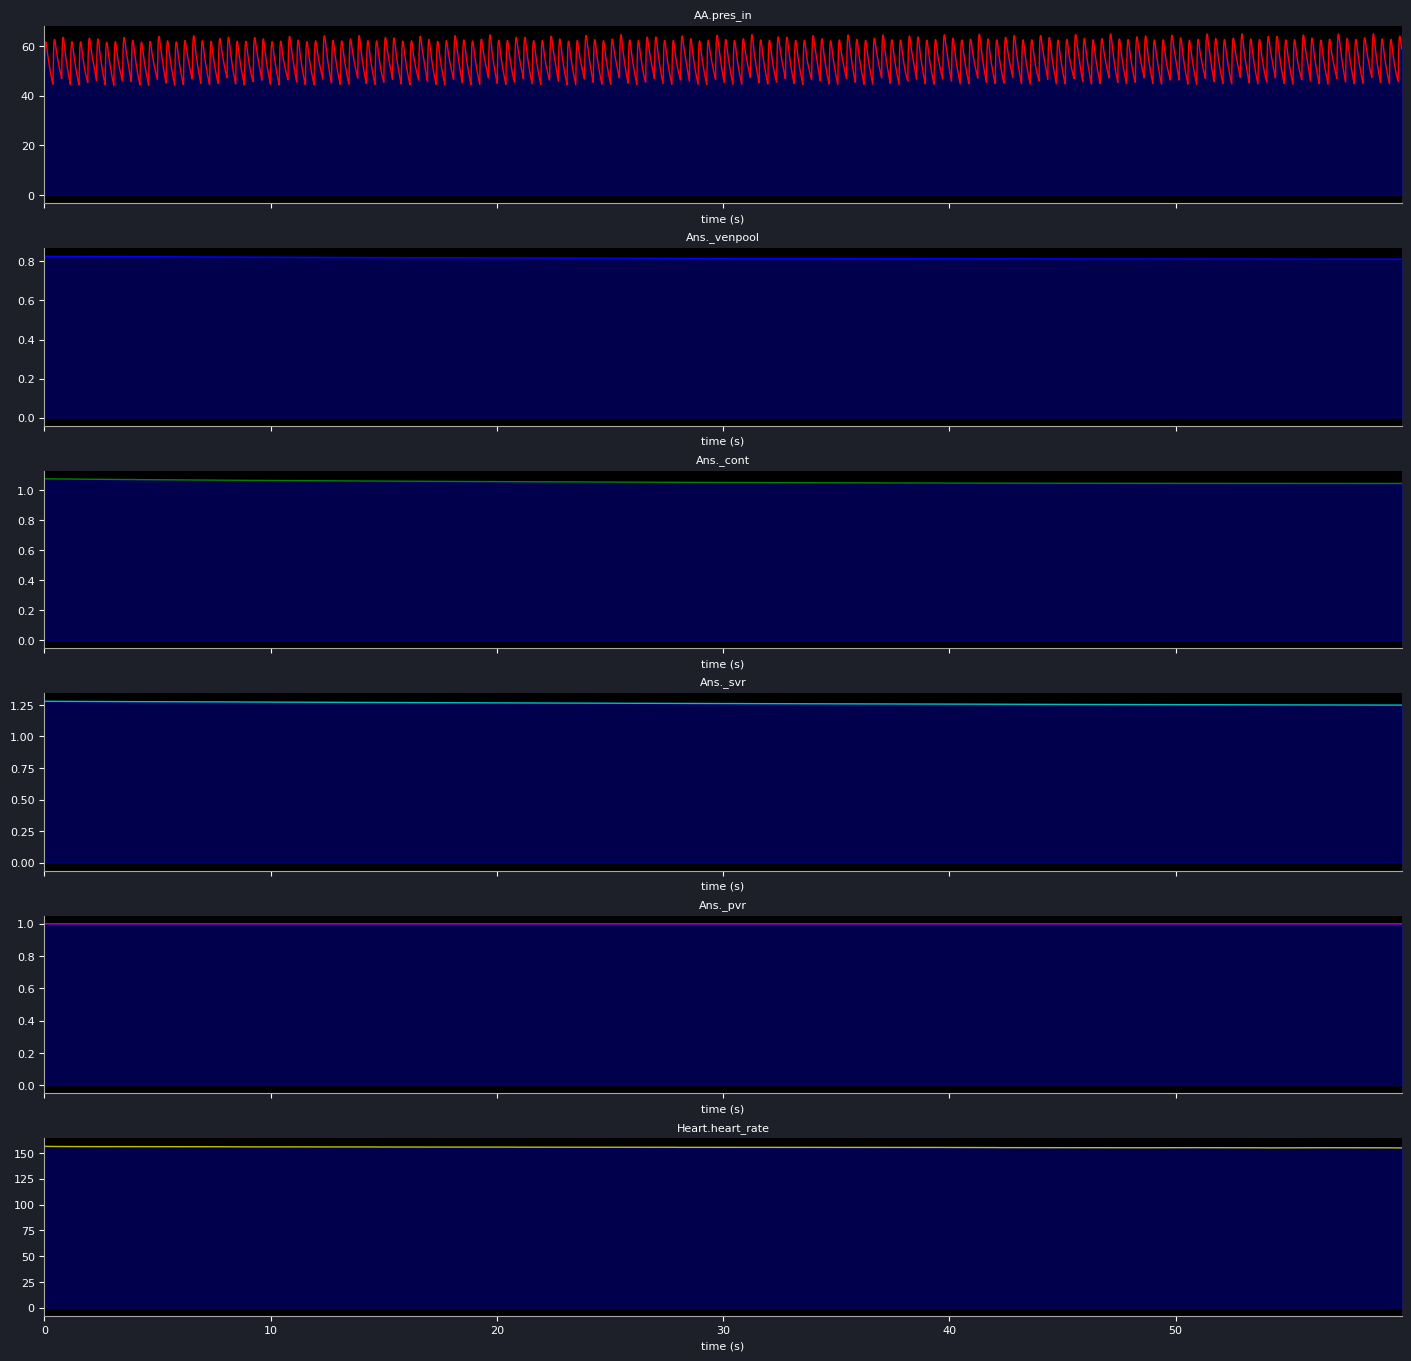


AA.pres_in      : max   65.01122 min   44.24802
Ans._venpool    : max    0.82671 min    0.81178
Ans._cont       : max    1.07792 min    1.04663
Ans._svr        : max    1.27809 min    1.24813
Ans._pvr        : max        1.0 min        1.0
Heart.heart_rate: max  156.38636 min  154.86977


In [4]:
#models["Fluids"].remove_volume(vol=75, in_time=10)
neo.plot_time_graph(["AA.pres_in","Ans._venpool","Ans._cont","Ans._svr", "Ans._pvr", "Heart.heart_rate"], combined=False, sharey=False, time_to_calculate=60, analyze=True, fill=True)

In [5]:
neo.fastforward(120)

 Ready in 6.4 sec. Average model step in 0.0266 ms.


In [6]:
neo.get_vitals()


AA.pres         : max   57.97553, min   38.71614 mmHg
PA.pres         : max   31.24371, min   11.82273 mmHg
IVCI.pres       : max   -0.15091, min   -1.51046 mmHg


{'heartrate': 154.71201359118828,
 'spo2_pre': 97.86282004046727,
 'spo2_post': 97.51456349557724,
 'abp_systole': 57.97553,
 'abp_diastole': 38.71614,
 'pap_systole': 31.24371,
 'pap_diastole': 11.82273,
 'cvp': -1.057321985,
 'resp_rate': 41.167583262687444,
 'pH': 7.401017514104385,
 'po2': 98.64586624081923,
 'pco2': 42.31744042098359,
 'hco3': 25.95677195870935,
 'be': 0.720796526696376}